# Image Classification: Classifying a general scene images 

https://www.kaggle.com/vincee/intel-image-classification-cnn-keras
Data consists of 150x150 pictures of scenes from real-world classified into 6 classes: ['building','forest','glacier','mountain','sea','street'].  Data is separated into training, validation and test directories.

Each class has about 2000 images in the training set, 400 images in the validation set and 100 images in the test set. This dataset is balanced with respect to all six classes.

In [ ]:
import matplolib.pyplot as plt

fig = plt.subplots(1, 4, figsize=(15,5))


### Model building

In [30]:


from keras import layers, models

m1 = models.Sequential()
m1.add(layers.Conv2D(32,(3,3), activation = 'relu', input_shape = (150,150,3)))
m1.add(layers.MaxPooling2D((2,2)))
m1.add(layers.Conv2D(64, (3,3), activation = 'relu'))
m1.add(layers.MaxPooling2D((2,2)))
m1.add(layers.Conv2D(128, (3,3), activation = 'relu'))
m1.add(layers.MaxPooling2D((2,2)))
m1.add(layers.Conv2D(128, (3,3), activation = 'relu'))
m1.add(layers.MaxPooling2D((2,2)))
m1.add(layers.Flatten())
m1.add(layers.Dense(512,activation='relu'))
m1.add(layers.Dense(6,activation = 'softmax'))

m1.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 15, 15, 128)      

In [32]:
from keras import optimizers

m2 = m1
m1.compile(loss='categorical_crossentropy',
             optimizer = optimizers.Adam(lr=1e-04),
             metrics=['acc'])
m2.compile(loss='categorical_crossentropy',
             optimizer = optimizers.SGD(lr=1e-04,momentum=0.9),
             metrics=['acc'])


### Data Preprocessing

In [26]:
from keras.preprocessing.image import ImageDataGenerator
import os

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

base_dir = 'C:/Sandeep/Learning/NNDL-GC/HW/HW3/intel-image'
train_dir = os.path.join(base_dir,'seg_train')
valid_dir = os.path.join(base_dir,'seg_test')
test_dir = os.path.join(base_dir,'seg_pred')

train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size = (150,150),
                                                   batch_size = 6,
                                                   class_mode = 'categorical')
valid_generator = test_datagen.flow_from_directory(valid_dir,
                                                   target_size = (150,150),
                                                   batch_size = 6,
                                                   class_mode = 'categorical')

for data_batch, labels_batch in train_generator:
    print('db shape', data_batch.shape)
    print('lb shape', labels_batch.shape)
    break

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.
db shape (6, 150, 150, 3)
lb shape (6, 6)


### Fitting first model w ADAM optimizer

In [34]:

history = m1.fit_generator(train_generator,
                             steps_per_epoch = 100,
                             epochs = 40,
                             validation_data = valid_generator,
                             validation_steps = 100)
m1.save('ii_1.h5')


Epoch 1/40
100/100 [==============================] - 37s 369ms/step - loss: 1.1937 - acc: 0.5433 - val_loss: 1.1722 - val_acc: 0.5433
Epoch 2/40
100/100 [==============================] - 38s 379ms/step - loss: 1.2171 - acc: 0.5300 - val_loss: 1.0232 - val_acc: 0.5750
Epoch 3/40
100/100 [==============================] - 37s 371ms/step - loss: 1.1643 - acc: 0.5550 - val_loss: 0.7854 - val_acc: 0.5700
Epoch 4/40
100/100 [==============================] - 37s 373ms/step - loss: 1.1611 - acc: 0.5600 - val_loss: 1.2566 - val_acc: 0.5350
Epoch 5/40
100/100 [==============================] - 36s 363ms/step - loss: 1.1150 - acc: 0.5767 - val_loss: 1.0691 - val_acc: 0.5117
Epoch 6/40
100/100 [==============================] - 37s 367ms/step - loss: 1.1829 - acc: 0.5217 - val_loss: 1.3577 - val_acc: 0.5700
Epoch 7/40
100/100 [==============================] - 37s 373ms/step - loss: 1.1510 - acc: 0.5617 - val_loss: 1.2487 - val_acc: 0.5483
Epoch 8/40
100/100 [==============================] - 3

In [43]:
import pickle
hist_dump = open('ii2_HistoryDict.pickle', 'wb')
pickle.dump(history.history, hist_dump)
hist_dump.close()

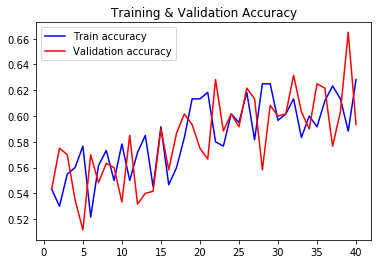

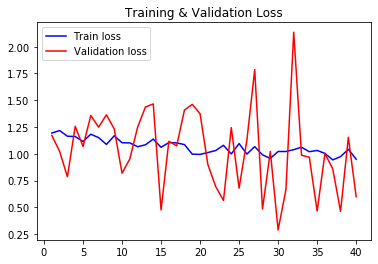

In [37]:

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs,acc, 'b', label='Train accuracy')
plt.plot(epochs,val_acc, 'r', label='Validation accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,loss, 'b', label="Train loss")
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training & Validation Loss')
plt.legend()

plt.show()

### Fitting second model w SGD + momentum

In [38]:
history = m2.fit_generator(train_generator,
                             steps_per_epoch = 100,
                             epochs = 40,
                             validation_data = valid_generator,
                             validation_steps = 100)
m2.save('ii_2.h5')

Epoch 1/40
100/100 [==============================] - 35s 351ms/step - loss: 0.9930 - acc: 0.6183 - val_loss: 1.5890 - val_acc: 0.5950
Epoch 2/40
100/100 [==============================] - 36s 362ms/step - loss: 0.9628 - acc: 0.6367 - val_loss: 0.6478 - val_acc: 0.6133
Epoch 3/40
100/100 [==============================] - 35s 349ms/step - loss: 0.9548 - acc: 0.6450 - val_loss: 0.9442 - val_acc: 0.5967
Epoch 4/40
100/100 [==============================] - 36s 360ms/step - loss: 1.0410 - acc: 0.5967 - val_loss: 0.4233 - val_acc: 0.6450
Epoch 5/40
100/100 [==============================] - 36s 362ms/step - loss: 1.0054 - acc: 0.6300 - val_loss: 0.8999 - val_acc: 0.6350
Epoch 6/40
100/100 [==============================] - 36s 360ms/step - loss: 1.0082 - acc: 0.5983 - val_loss: 0.7091 - val_acc: 0.6167
Epoch 7/40
100/100 [==============================] - 36s 358ms/step - loss: 0.9698 - acc: 0.6417 - val_loss: 1.0426 - val_acc: 0.6317
Epoch 8/40
100/100 [==============================] - 3

### Dropout

In [ ]:
#

import matplotlib.pyplot as plt
from keras import layers, models, optimizers

# Exploring weight initialization for the first model's architecture (using Adam optimizer)
# but changing various initialization schemes
def build_model_lr(lrate): 
    model = models.Sequential()
    model.add(layers.Conv2D(32,(3,3), activation = 'relu', input_shape = (150,150,3)))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(512,activation='relu'))
    model.add(layers.Dense(6,activation = 'softmax'))

    #model.summary()
    model.compile(loss='categorical_crossentropy',
             optimizer = optimizers.SGD(lr=lrate,momentum=0.9),
             metrics=['acc'])
    
    return model

lrate = [0.1,0.01,0.001]

for i in range(len(lrate)):
    plot_num = 420+ i+1
    plt.subplot(plot_num)
    lr = lrate[i]
    m_lr = build_model_lr(lr)
    history = m_lr.fit_generator(train_generator,
                                 steps_per_epoch = 100,
                                 epochs = 40,
                                 validation_data = valid_generator,
                                 validation_steps = 100)
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1,len(acc)+1)

    plt.plot(epochs,acc, 'b', label='Train accuracy')
    plt.plot(epochs,val_acc, 'r', label='Validation accuracy')
    plt.title('Accuracy w/ lrate='+str(lr))
    plt.legend()



    plt.show()


In [3]:

img_path = test_dir + '1512.jpg'

from keras.preprocessing import image
import numpy as np

img = image.load_img(img_path,target_size=(150,150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

#plt.imshow(img_tensor[0])
#plt.show()

from keras.models import load_model 
#from keras import models

#m1 = load_model('cd_1.h5')
print(m1.predict(img_tensor))



[[0.9380304]]


### Data Augmentation & Shuffling
The above models have a low training & validation learning rate (Accuracy still at ~60% after 40 epochs. First solution to be explored is to apply data augmentation & shuffling.

In [39]:
# Data augmentation using rotation, shifting, shearing, zooming & flipping

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range=40,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

# Shuffling
train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size = (150,150),
                                                   batch_size = 100,
                                                   class_mode = 'categorical',
                                                    shuffle=True)
valid_generator = test_datagen.flow_from_directory(valid_dir,
                                                   target_size = (150,150),
                                                   batch_size = 100,
                                                   class_mode = 'categorical',
                                                    shuffle=True)


Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [42]:
# New model with dropout
from keras import layers, models

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation = 'relu', input_shape = (150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(6,activation = 'softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer = optimizers.Adam(lr=1e-04),#,beta_1=0.9, beta_2=0.999),
             metrics=['acc'])

history = model.fit_generator(train_generator,
                             steps_per_epoch = 100,
                             epochs = 50,
                             validation_data = valid_generator,
                             validation_steps = 50)
model.save('ii_aug_shufl.h5')


Epoch 1/50
100/100 [==============================] - 329s 3s/step - loss: 1.3953 - acc: 0.4290 - val_loss: 1.1380 - val_acc: 0.5700
Epoch 2/50
100/100 [==============================] - 317s 3s/step - loss: 1.1508 - acc: 0.5401 - val_loss: 1.0579 - val_acc: 0.5822
Epoch 3/50
100/100 [==============================] - 326s 3s/step - loss: 1.0718 - acc: 0.5916 - val_loss: 1.1439 - val_acc: 0.6352
Epoch 4/50
100/100 [==============================] - 328s 3s/step - loss: 0.9741 - acc: 0.6342 - val_loss: 1.2280 - val_acc: 0.6724
Epoch 5/50
100/100 [==============================] - 238s 2s/step - loss: 0.9439 - acc: 0.6449 - val_loss: 0.9365 - val_acc: 0.7230
Epoch 6/50
100/100 [==============================] - 183s 2s/step - loss: 0.9204 - acc: 0.6558 - val_loss: 0.9785 - val_acc: 0.6714
Epoch 7/50
100/100 [==============================] - 195s 2s/step - loss: 0.8884 - acc: 0.6606 - val_loss: 0.8485 - val_acc: 0.7090
Epoch 8/50
100/100 [==============================] - 205s 2s/step - 

In [45]:
hist_dump = open('ii_shifl_Aug_HistoryDict.pickle', 'wb')
pickle.dump(history.history, hist_dump)
hist_dump.close()

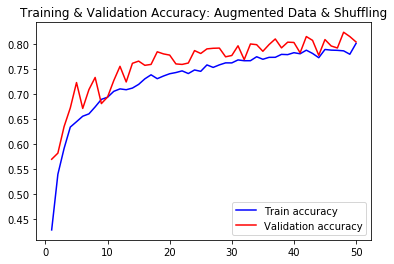

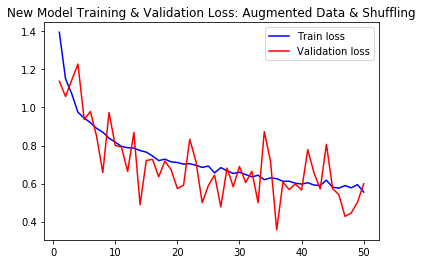

In [46]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs,acc, 'b', label='Train accuracy')
plt.plot(epochs,val_acc, 'r', label='Validation accuracy')
plt.title('Training & Validation Accuracy: Augmented Data & Shuffling')
plt.legend()

plt.figure()

plt.plot(epochs,loss, 'b', label="Train loss")
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('New Model Training & Validation Loss: Augmented Data & Shuffling')
plt.legend()

plt.show()

### Confusion Matrix for Model with Data augmentation and shuffling


In [47]:
from sklearn.metrics import confusion_matrix
import numpy as np

test_generator = test_datagen.flow_from_directory(
        valid_dir,
        target_size=(150, 150),
        color_mode="rgb",
        shuffle = False,
        class_mode='categorical',
        batch_size=32)

filenames = test_generator.filenames
nb_samples = len(filenames)

predictions = model.predict_generator(test_generator,steps = nb_samples/32)

test_labels = test_generator.labels

cm = confusion_matrix(np.argmax(predictions, axis=1), test_labels)

print (cm)

Found 3000 images belonging to 6 classes.
[[295   2   8  15  18  20]
 [ 32 467  15  10   8  38]
 [  2   0 413  60  37   1]
 [ 14   2  60 406  28   4]
 [  6   0  34  28 400   5]
 [ 88   3  23   6  19 433]]


#### Comment based on confusion matrix comparison
Compared to the model with "better" hyperparameters, the model that used default hyperparamters but used shuffling and data augmentation performs much better. Particularly, the improvement is significant in classifying 'sea' (fifth class). There is also improvement in other classes. However, identifying 'buildings' first class has not improved much.

#### Sample Prediciton Probabilities

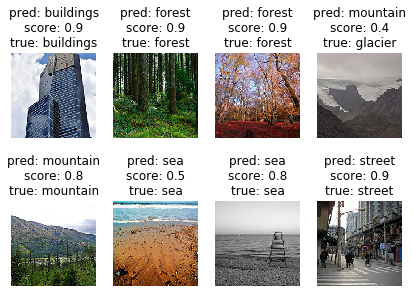

In [80]:
# Some test predictions

cols = 4
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 3 * rows - 1))

name_labels = [
    'buildings',
    'forest',
    'glacier',
    'mountain',
    'sea',
    'street'
]

for i in range(cols):
    for j in range(rows):
        #random_index = np.random.randint(0, len(y_test))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        img_index = i*750+j*550
        img_path= valid_dir + "/" + test_generator.filenames[img_index] #os.path.join(test_generator.filenames)
        img = image.load_img(img_path,target_size=(150,150))
        ax.imshow(img)
        pred_label =  name_labels[np.argmax(predictions[img_index])]#, axis=1)
        pred_proba = np.max(predictions[img_index]).astype('str')
        true_label = name_labels[test_labels[img_index]]
        ax.set_title("pred: {}\nscore: {:.3}\ntrue: {}".format(
               pred_label, pred_proba, true_label
        ))
plt.show()

## Visualizing 

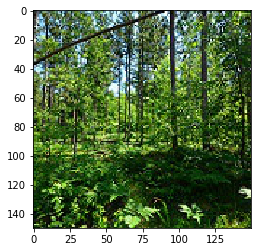

In [51]:
# import example image for channel activation map visualization
img_path = 'intel-image/seg_pred/64.jpg'

from keras.preprocessing import image
import numpy as np

img = image.load_img(img_path,target_size=(150,150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

plt.imshow(img_tensor[0])
plt.show()

C:\Anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("co..., outputs=[<tf.Tenso...)`
  
C:\Anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


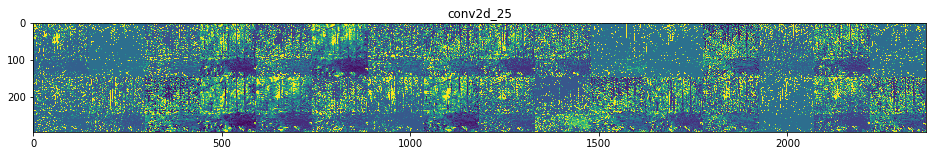

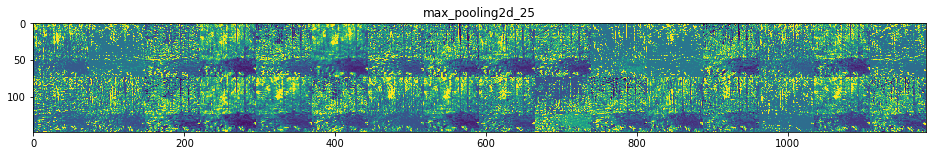

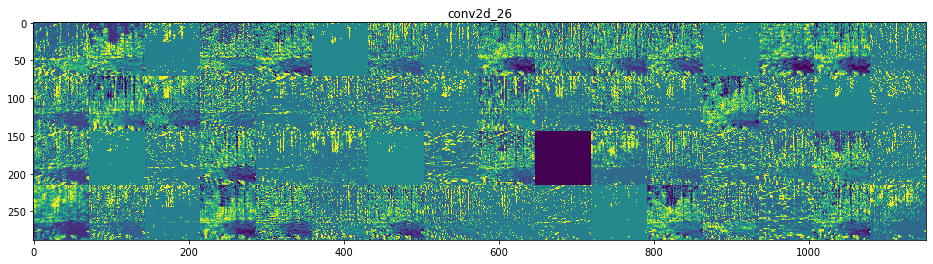

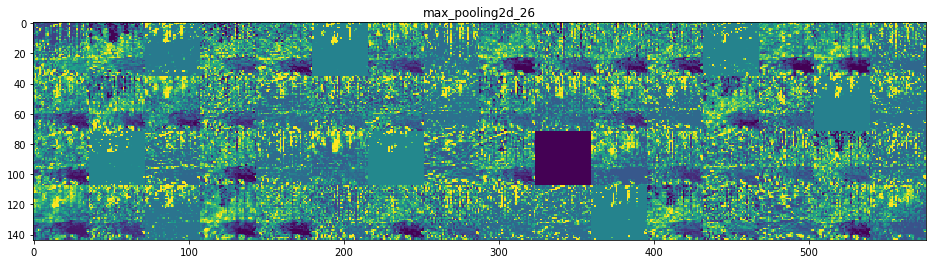

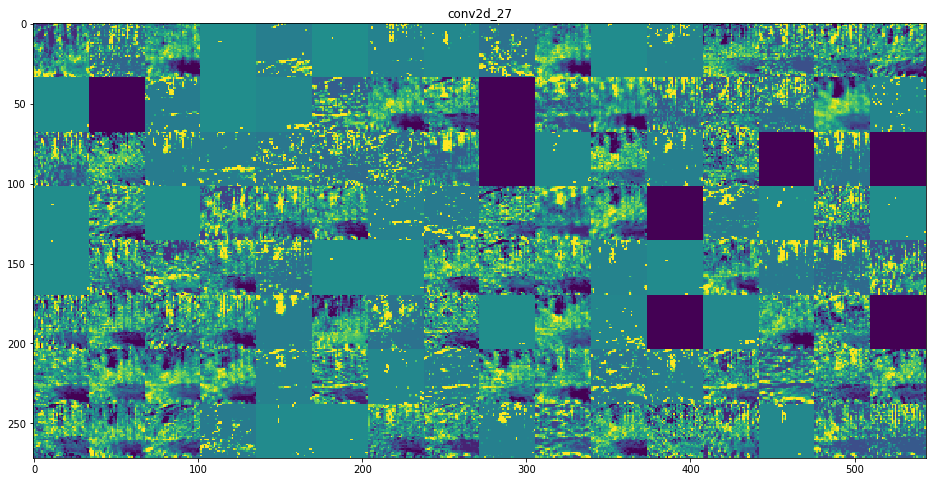

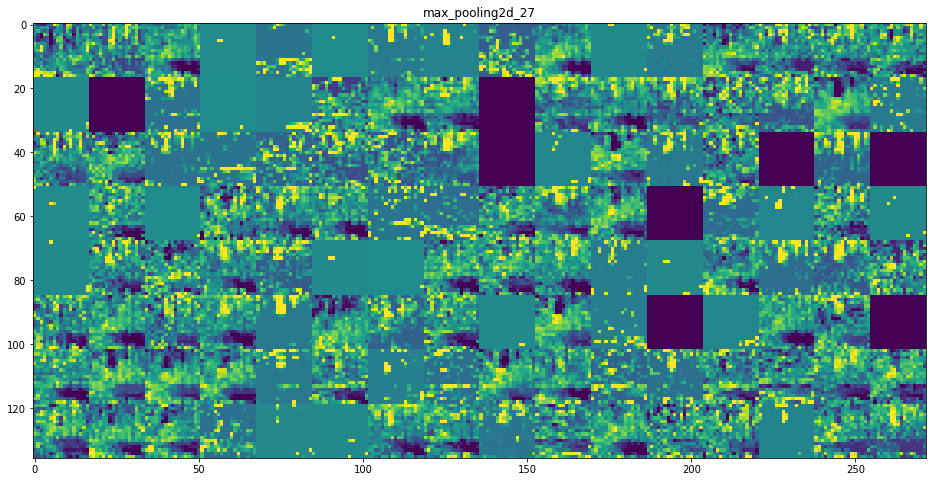

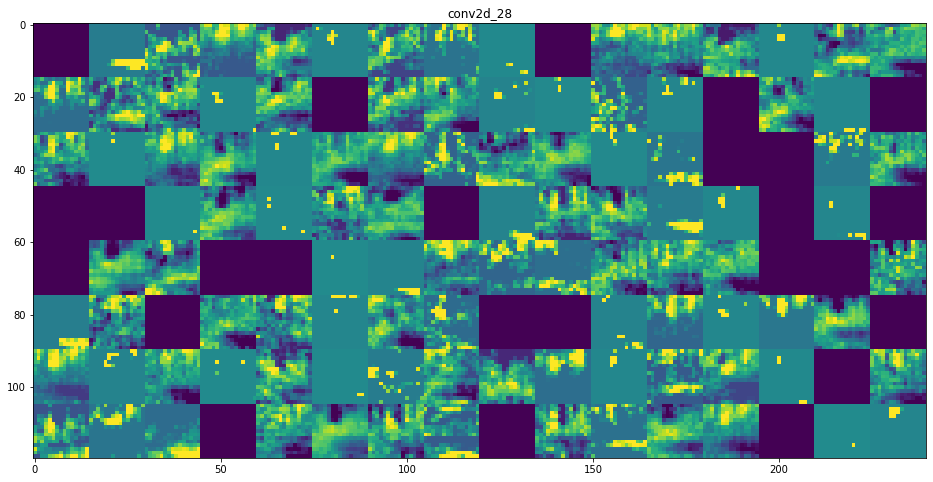

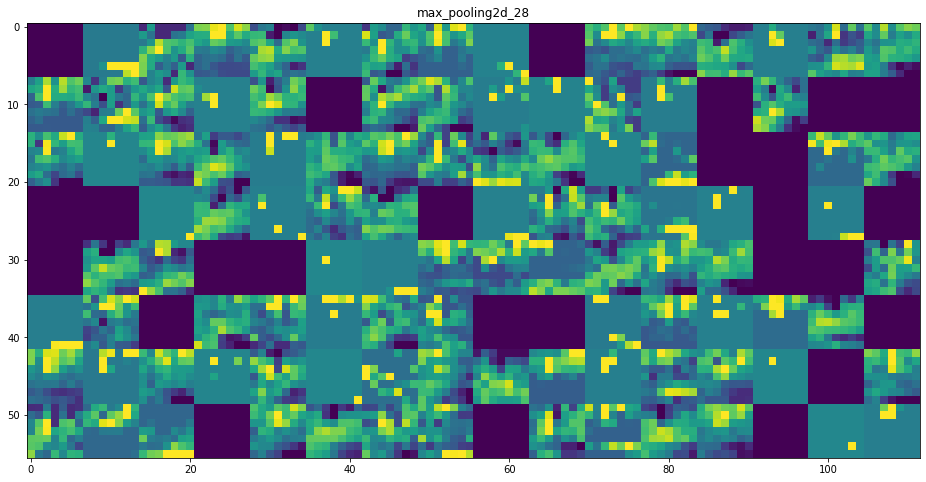

In [52]:
from keras.models import load_model 
from keras import models

m2 = load_model('ii_aug_shufl.h5')
layer_outputs = [layer.output for layer in m2.layers[:8]]
activation_model = models.Model(inputs=m2.input, output=layer_outputs)
activations = activation_model.predict(img_tensor)

layer_names = []
for layer in m2.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    n_cols = n_features // images_per_row
    
    display_grid = np.zeros((size*n_cols, images_per_row*size))
    
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,:,:,
                                            col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col*size:(col+1)*size,
                        row*size:(row+1)*size] = channel_image
    scale = 1./size
    plt.figure(figsize = (scale*display_grid.shape[1],
                         scale*display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    

Each channel extracts specific features from the images. Channel 4 (fourth column images) highlights that the channel can identify vertical dark lines better. Channel 5 & 15 seems to be identifying contrast between light & dark better.

## Visualizing Filters

In [53]:
from keras import backend as K
from keras.models import load_model 
from keras import models

m2 = load_model('ii_aug_shufl.h5')

# funciton to convert a tensor to image
def deprocess_image(x):
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1
    
    x += 0.5
    x = np.clip(x,0,1)
    
    x *= 255
    x = np.clip(x,0,255).astype('uint8')
    return x

def generate_pattern(filter_ind, size=150):
    
    layer_output = m2.get_layer('conv2d_25').output # using layer max_pooling2d_28
    loss = K.mean(layer_output[:,:,:,filter_ind]) # getting loss for first filter

    grads = K.gradients(loss,m2.input)[0]

    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-05) # normalizing gradients with its L2 norm

    # Getting loss and gradient tensors from the DL model
    iterate = K.function([m2.input], [loss,grads])
    #loss_value, grads_value = iterate([np.zeros((1,150,150,3))])

    input_img_data = np.random.random((1,size,size,3)) * 20 + 128.

    step = 1.
    for i in range(40):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step

    img = input_img_data[0]
    
    return deprocess_image(img)

#    plt.imshow(deprocess_image(img))

In [ ]:
margin = 5
size = 150
results = np.zeros((8*size + 7*margin, 8*size + 7*margin, 3))

for i in range(8):
    for j in range(8):
        filter_img = generate_pattern( i+(j*8), size)
        
        hor_start = i*size + i*margin
        hor_end = hor_start + size
        ver_start = j*size + j*margin
        ver_end = ver_start + size
        results[hor_start:hor_end,
               ver_start:ver_end,
               :] = filter_img

plt.figure(figsize=(20,20))
plt.imshow(results)